In [2]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.symmetry_scores import get_scores_full

from transformers import AutoModelForCausalLM

In [3]:
dir = '../../../../_data/fig-symmetry-language-models/full-models/Phi-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [4]:
path = ["model.layers[", "].self_attn.q_proj.weight", "].self_attn.k_proj.weight"]

'Phi 1 model (tot num parameters 1.3B)'
dh = 64
l = 24
d = 2048
h = d // dh

model = AutoModelForCausalLM.from_pretrained("microsoft/phi-1", torch_dtype="auto")
score_List= get_scores_full(d, l, h, dh, model, path)
models['Phi-1'] = [l, d, h, dh, score_List]

'Phi 1.5 model (tot num parameters 1.3B)'

model = AutoModelForCausalLM.from_pretrained("microsoft/phi-1_5", torch_dtype="auto")
score_List= get_scores_full(d, l, h, dh, model, path)
models['Phi-1.5'] = [l, d, h, dh, score_List]

# 'Phi 2 model (tot num parameters 2.7B)'
# dh = 64
# l = 32
# d = 2560
# h = d // dh

# model = AutoModelForCausalLM.from_pretrained("microsoft/phi-2", torch_dtype="auto", trust_remote_code=True)
# score_List= get_scores(d,l,h,dh,model)
# models['Phi-2.'] = [l, d, h, dh, score_List]


In [3]:
'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

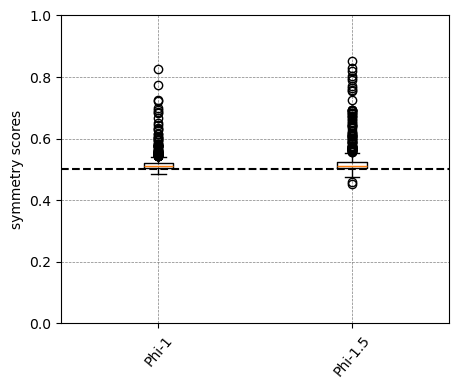

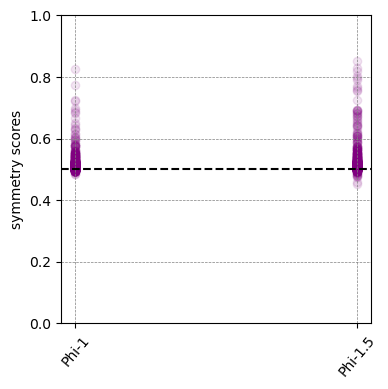

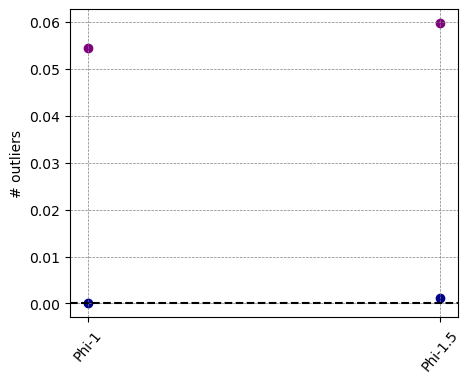

In [4]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)